<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Корреляции" data-toc-modified-id="Корреляции-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Корреляции</a></span></li></ul></div>

#  Корреляции

В этой тетрадке мы поговорим про корреляции. 

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

Будем использовать небольшой набор данных по тому, как люди платят чаевые. 

In [37]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


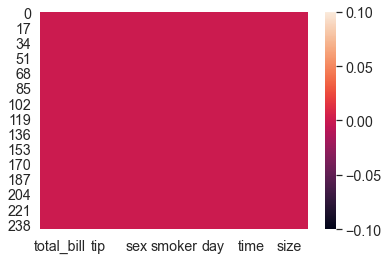

In [43]:
# проупуски
sns.heatmap(df.isna());

In [45]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
# # новая переменная - процент чаевых от счёта
# df['tip_pct'] = 100 * df['tip'] / df['total_bill']

__Посмотрим как между собой ваимосвязаны счёт, чаевые и пол клиента.__ 

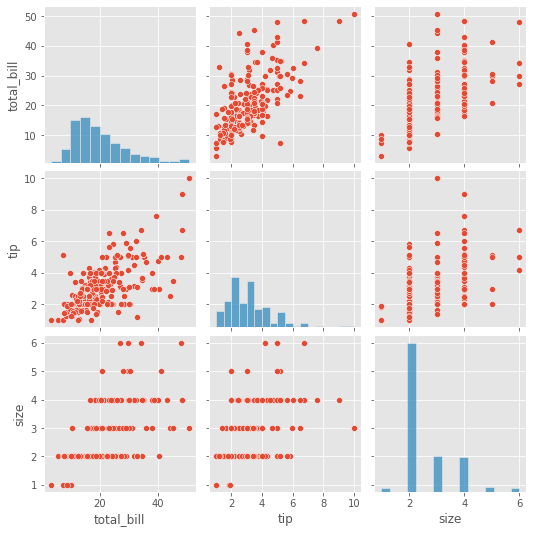

In [5]:
sns.pairplot(df, height=2.5, kind='scatter'); # kind = 'reg'

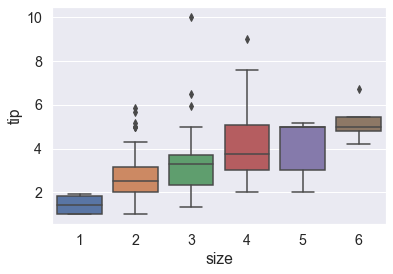

In [46]:
sns.boxplot(data=df, x='size', y='tip');

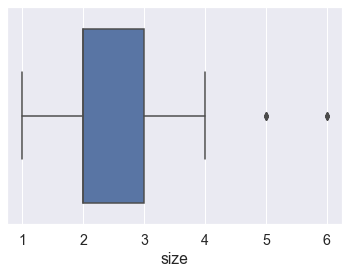

In [57]:
sns.boxplot(data=df, x='size');

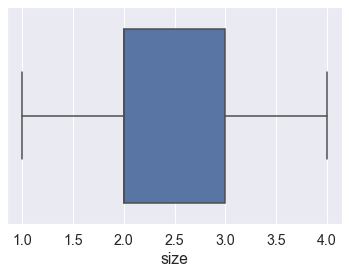

In [56]:
q = 0.97

sns.boxplot(data=df[df['size'] < np.quantile(df['size'], q)], x='size');

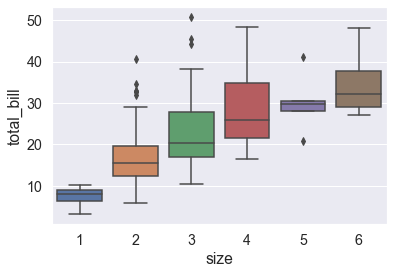

In [20]:
sns.boxplot(data=df, x='size', y='total_bill');

In [35]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [36]:
df.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [22]:
df.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


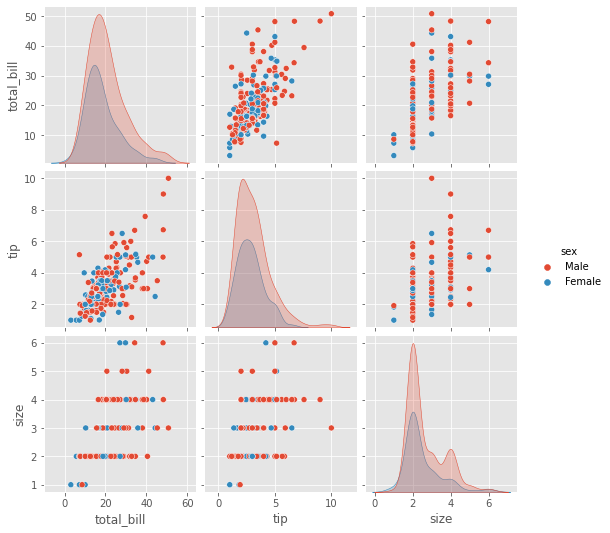

In [6]:
sns.pairplot(df, hue='sex', height=2.5, kind='scatter'); # kind = 'reg'

- Видно, что общий счёт и величина чаевых зависят друг от друга: чем больше счёт, тем больше чаевых оставляют, с долей (`tip_pct`) подобной взаимосвязи не видно 
- Пол никак не влияет на то, какое количество чаевых оставлено, красные и синие точки на графиках распределены равномерно, плотности на диагонали выглядят похожим образом. 

__Посмотрим на разбиение по дням недели.__

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


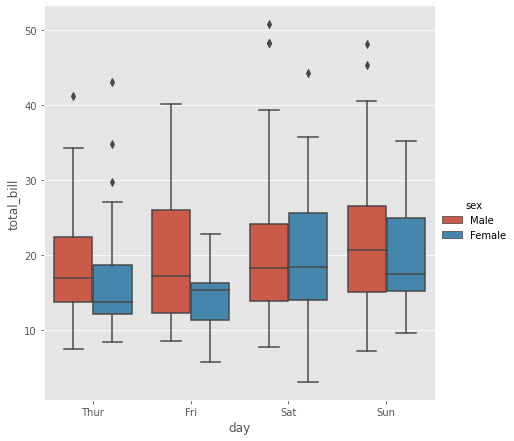

In [7]:
sns.catplot("day", "total_bill", "sex", data=df, kind="box", size=6);

- Почему-то в пятницу мужчины платят больше чаевых, чем женщины. Возможно, что это как-то связано с пятничными свиданиями и с древней традицией: счёт оплачивает мужчина. Но правда ли это так?

__Давайтте посмотрим сколько наблюдений приходится на какой день недели.__ 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


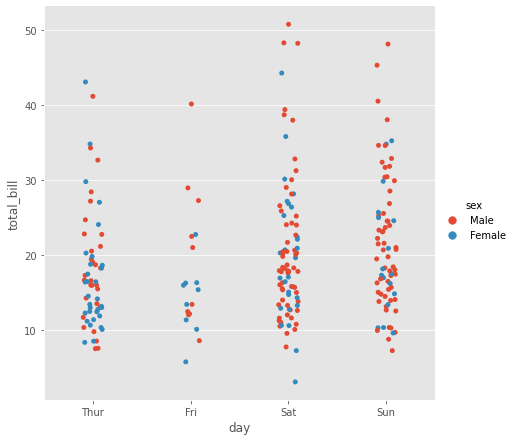

In [8]:
sns.catplot("day", "total_bill", "sex", data=df, size=6);

- Более подробный взгляд на данные показывает, что это связано не с тем, что счёт оплачивает мужчина, а с тем, что в выборке мало данных с пятницы. Из-за этого мы видим такую разницу между чаевыми. 
- В будущем мы будем говорить про статистические тесты. Они будут помогать нам отличать случайную разницу, как в этом примере, от настоящей. 

__Можно посмотреть на взаимосвязь только двух переменных.__

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


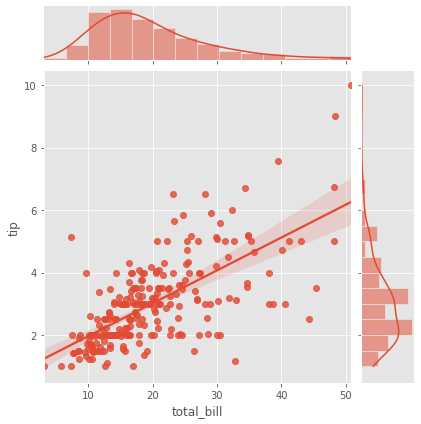

In [9]:
sns.jointplot("total_bill", "tip", data=df, kind='reg');

- Снова видим, что чем больше общий счёт, тем большую сумму оставляют в качестве чаевых. Хочется провести сквозь точки линию регрессии. 

__Посмотрим на ковариационную матрицу.__

In [10]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [11]:
df.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


Можно визуализировать матрицу с помощью тепловой карты. 

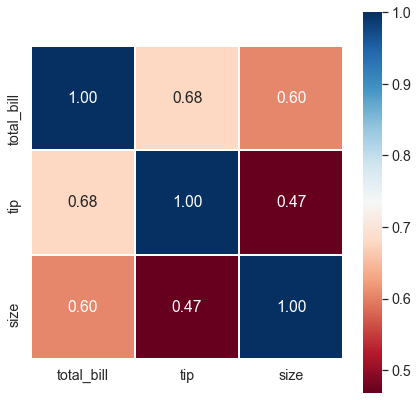

In [12]:
sns.set(font_scale=1.3)
plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(method='spearman'), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

- Видно, что корреляция Спирмэна и Пирсона не сильно отличаются друг от друга в нашем примере. Это связано с тем, что взаимосвязи в данных линейные. 

__Пример с рангами из презентации:__

Корреляция Спирмэна - это корреляция Пирсона, которую посчитали между рангами. 

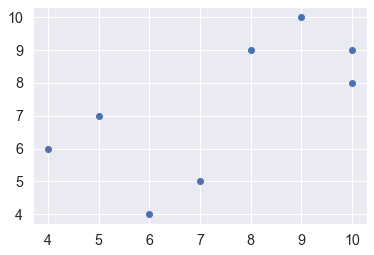

In [27]:
plt.scatter(x,y)

In [28]:
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])
stats.spearmanr(x,y).correlation

0.644578313253012

In [29]:
rx = np.array([7.5, 5, 3, 4, 1, 7.5, 6, 2])
ry = np.array([6.5, 6.5, 1, 2, 3, 5, 8, 4])
stats.pearsonr(rx,ry)[0]

0.6445783132530121

In [31]:
np.random.normal(0,1)

2.3680230892606007

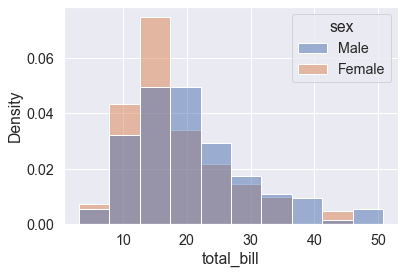

In [58]:
sns.histplot(data=df, x='total_bill', hue='sex', common_norm=False, stat='density', bins=10);

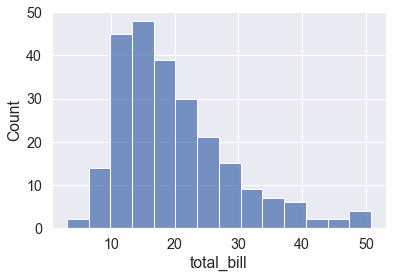

In [62]:
sns.histplot(data=df, x='total_bill');

In [65]:
from sklearn.preprocessing import power_transform

In [66]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()



In [72]:
data = df[['total_bill']]
pt.fit(data)
pt.lambdas_

array([0.00806546])

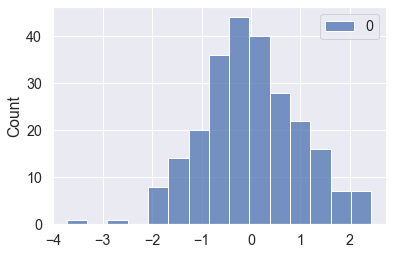

In [74]:
sns.histplot(pt.transform(data));